#Twitter Sentiment Analysis 

dataset link : https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=train.csv

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize

#Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding

#Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

matplotlib - used for data visualization and graphical plotting

seaborn - built on top of matplotlib with similar functionalities

%matplotlib - to enable the inline plotting.

keras tokenizer - Give unique integer value to each token

Sequence - put the token back into sequence

Embedding layer - Each token converted into vector




In [ ]:
#read_csv is used to load a CSV file as a pandas dataframe.

df=pd.read_csv("/content/drive/MyDrive/NLP/Assignments of NLP/train.csv")

df.head()   #head is used for to read first 5 rows 

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#Info

The info() function is used to print a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.Whether to print the full summary. By default, the setting in pandas.

In [ ]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
#isnull(). sum(). sum() returns the number of missing values in the data set.

df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
#value_counts() function return a Series containing counts of unique values.

df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
#The drop() method removes the specified row or column. By specifying the column axis ( axis='columns' ), the drop() method removes the specified column. 
#By specifying the row axis ( axis='index' ), the drop() method removes the specified row.

df.drop(['id'],axis=1,inplace=True)

In [ ]:
#Pandas str. len() method is used to determine length of each string in a Pandas series.

df['length'] = df['tweet'].apply(lambda x: len(x))
df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


#preprocessing the dataset

Objective of Preprocessing of Data : if we preprocess the data correctly then we get more accuracy 

In [ ]:
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for data in r:
    input_txt = re.sub(data, "",input_txt)
  return input_txt

In [ ]:
#remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [ ]:
df.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,factsguide: society now #motivation


#Remove Emoji

In [ ]:
 !pip install emoji
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 2.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=cb8f66b2be0d3a91109a08e3e966032ced33904e0787a5215032a930542a1bdf
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
def deEmojify(inputString):
  return inputString.encode('ascii','ignore').decode('ascii')


#Plot WordCloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

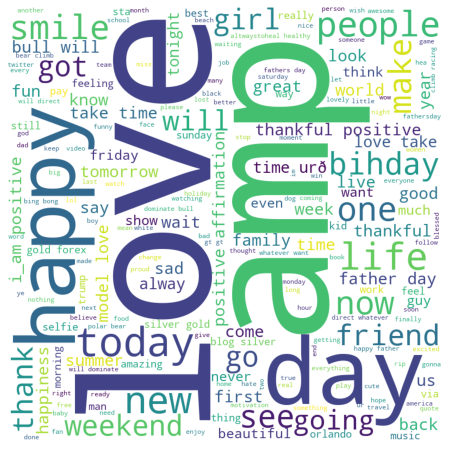

In [ ]:
#Visualize the frequent words  

freq_words = ' '.join(sentence for sentence in df['clean_tweet'])

wc=WordCloud(width=800,height=800,
             background_color='white',
             min_font_size=10)
wc.generate(freq_words)

plt.figure(figsize=(8,8))
plt.imshow(wc) 
plt.axis("off") 
plt.show()

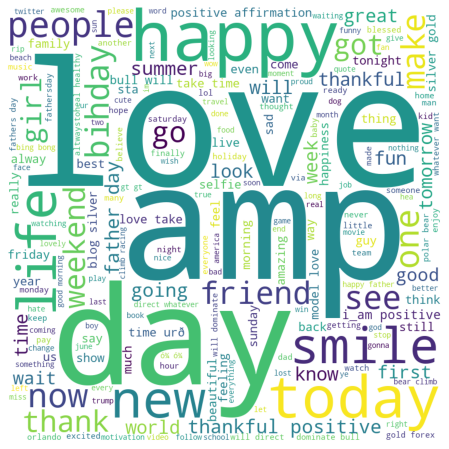

In [ ]:
#Frequent words visualization for positive 

positive_tweet = ' '.join(df[df['label']== 0]['clean_tweet'])

wc=WordCloud(width=800,height=800,
             background_color='white',
             min_font_size=10)
wc.generate(positive_tweet)

plt.figure(figsize=(8,8))
plt.imshow(wc) 
plt.axis("off") 
plt.show()

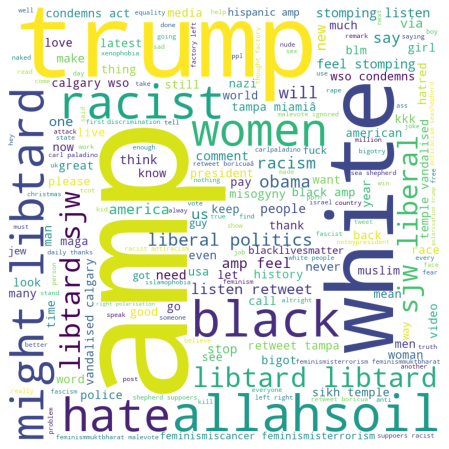

In [ ]:
#Frequent words visualization for Negative 

Negative_tweet = ' '.join(df[df['label']== 1]['clean_tweet'])

wc=WordCloud(width=800,height=800,
             background_color='white',
             min_font_size=10)
wc.generate(Negative_tweet)

plt.figure(figsize=(8,8))
plt.imshow(wc) 
plt.axis("off") 
plt.show()

#Before balancing the data check how many Positive and Negative Tweets by using Bar graph

In [ ]:
#Pandas dataframe. groupby() function is used to split the data into groups based on some criteria.

label = df.groupby('label')['clean_tweet'].count()
print(label)

label
0    29720
1     2242
Name: clean_tweet, dtype: int64


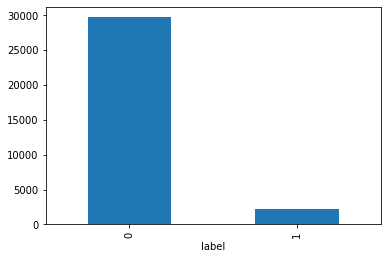

In [ ]:
label.plot(kind='bar') #Pandas uses the plot() method to create diagrams/graph. we can see positive tweets are more than negative tweets .

#Handling Imbalanced data 

In [ ]:
!pip install transformers
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 2.1 MB/s 
     |████████████████████████████████| 101 kB 10.8 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 6.6 MB 30.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 2.1 MB/s 


Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.

In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug

In [ ]:
augmenter = aug.ContextualWordEmbsAug(model_path= 'bert-base-uncased',action="insert")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [ ]:
sample_text = df['clean_tweet'].iloc[100]
sample_text

'there are some truly sick ppl out there.   '

In [ ]:
augmented_sample_text = augmenter.augment(sample_text)
augmented_sample_text

'there definitely are some truly scary sick looking ppl out there.'

In [ ]:
from tqdm.auto import tqdm     #tqdm is a Python library for adding progress bar. 
from sklearn.utils import shuffle    #The shuffle() function randomizes the order of the elements in the array. This function assigns new keys for the elements in the array.

In [ ]:
def augmentMyData(df,augmenter,repetitions=1, samples=200):
  augmented_texts = []
  #select only minority class sample
  negative_fb = df[df['label']==1].reset_index(drop=True) #remove unecessary index column
  for i in tqdm(np.random.randint(1, len(negative_fb), samples)):
    #generating 'n_samples' augmented texts
    for _ in range(repetitions):
      augmented_text = augmenter.augment(negative_fb['clean_tweet'].iloc[i])
      augmented_texts.append(augmented_text)

  data = {'label':1 ,'clean_tweet': augmented_texts}
  aug_df = pd.DataFrame(data)
  df = shuffle(df.append(aug_df).reset_index(drop=True))
  return df

In [ ]:
new_df = df.drop(labels=['length','tweet'],axis=1)
new_df.head()

,label,clean_tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
aug_df = augmentMyData(new_df, augmenter, samples=700)

  0%|          | 0/700 [00:00<?, ?it/s]

In [ ]:
aug_df['label'].value_counts()

0    29720
1     2942
Name: label, dtype: int64

In [ ]:
#Feature & Target
X = df['clean_tweet']
y = df['label']

In [ ]:
#split the data into train & test
X_train,_,y_train,_ =  train_test_split(aug_df['clean_tweet'],aug_df['label'],test_size=0.1)
_,X_test,_,y_test = train_test_split(df['clean_tweet'],df['label'],test_size=0.3)

In [ ]:
#Remove numbers
def remove_number(clean_tweet):
  no_pattern = r'\d+'
  without_no = re.sun(pattern=no_pattern, repl='',string=clean_tweet)
  return without_no

#Tokenization

Tokenization is a way of separating a piece of text into smaller units called tokens.

In [ ]:

tok=Tokenizer()
tok.fit_on_texts(X_train)

#Remove punctuation,and all tokens coverted into lowercase

In [ ]:
vocabulary=tok.index_word   
vocab_length=len(vocabulary)
vocab_length

43282

In [ ]:
#Sequence
train_seq= tok.texts_to_sequences(X_train)
train_seq

[[118, 106, 258, 11, 624, 15907, 494, 2, 5463, 15908],
 [34, 25, 97, 332, 5, 15909, 15910, 45, 434],
 [1261,
  16,
  887,
  155,
  1910,
  6,
  1039,
  42,
  14,
  1227,
  15911,
  888,
  194,
  271,
  15912],
 [7809,
  1292,
  15913,
  1086,
  10163,
  1320,
  7,
  4781,
  7,
  7,
  1152,
  1321,
  1322,
  13,
  647],
 [67, 907, 228, 15, 126, 82, 435, 187, 80, 10],
 [15914,
  131,
  101,
  10,
  87,
  2,
  1,
  699,
  256,
  5,
  27,
  2,
  826,
  347,
  43,
  862,
  2,
  217,
  15915],
 [1, 15916, 2359, 10, 104, 2, 27, 3, 46, 1293, 312, 12],
 [1228, 25, 185, 28, 118, 3870, 152, 26, 191, 18, 191, 18, 185, 15917],
 [1, 40, 9, 3, 4254, 28, 4782, 15918, 15919],
 [5464,
  308,
  107,
  218,
  889,
  35,
  5,
  98,
  121,
  22,
  89,
  441,
  54,
  542,
  267,
  1,
  229,
  5465],
 [4, 1087, 130, 7810, 8, 10164, 44, 1911, 2, 155, 41, 13],
 [170,
  2360,
  1402,
  15920,
  5466,
  84,
  1367,
  109,
  7,
  6376,
  9,
  2360,
  10165,
  5467,
  137,
  175,
  167,
  202],
 [142,
  24,
  128,


In [ ]:
doc_length=[]
for doc in train_seq:
  doc_length.append(len(doc))
print(doc_length)

[10, 9, 15, 15, 10, 19, 12, 14, 9, 18, 12, 18, 20, 13, 20, 22, 6, 8, 12, 15, 17, 3, 11, 7, 11, 26, 15, 18, 21, 17, 8, 15, 12, 15, 9, 27, 18, 9, 13, 24, 7, 17, 4, 12, 7, 8, 12, 21, 10, 15, 23, 8, 13, 22, 7, 21, 14, 22, 20, 15, 16, 14, 12, 13, 17, 6, 13, 24, 21, 7, 16, 24, 8, 15, 17, 16, 21, 14, 13, 10, 12, 10, 12, 15, 9, 6, 11, 10, 9, 14, 17, 12, 6, 12, 12, 12, 19, 18, 22, 11, 15, 4, 23, 17, 19, 15, 15, 13, 20, 8, 26, 24, 14, 10, 13, 14, 10, 4, 6, 6, 9, 14, 14, 16, 4, 13, 6, 6, 14, 23, 9, 7, 18, 8, 12, 12, 8, 7, 4, 13, 13, 6, 8, 16, 23, 19, 12, 20, 7, 7, 13, 12, 15, 21, 8, 7, 14, 8, 12, 16, 18, 4, 5, 11, 15, 17, 23, 5, 9, 14, 10, 14, 18, 12, 11, 15, 11, 19, 15, 22, 16, 13, 6, 16, 12, 11, 8, 17, 16, 17, 13, 21, 15, 17, 21, 9, 5, 6, 14, 26, 7, 8, 22, 14, 8, 12, 22, 24, 20, 11, 5, 20, 10, 3, 16, 10, 12, 19, 13, 7, 11, 12, 7, 4, 4, 12, 13, 11, 13, 13, 10, 14, 14, 10, 3, 18, 12, 13, 10, 18, 15, 11, 18, 7, 14, 23, 29, 20, 8, 7, 8, 2, 11, 17, 12, 10, 10, 6, 13, 19, 15, 4, 23, 12, 12, 8, 13, 25

In [ ]:
#The max() function returns the item with the highest value.

max(doc_length)

42

In [ ]:
#In Python, the numpy. quantile() function takes an array and a number say q between 0 and 1. It returns the value at the q th quantile.

np.quantile(doc_length,0.99)

27.0

In [ ]:
max_length = 27

#Padding

All documents must have same length so in padding putting zero to create same length.

In [ ]:
train_matrix=sequence.pad_sequences(train_seq,maxlen=max_length)
train_matrix

array([[    0,     0,     0, ...,     2,  5463, 15908],
       [    0,     0,     0, ..., 15910,    45,   434],
       [    0,     0,     0, ...,   194,   271, 15912],
       ...,
       [    0,     0,     0, ...,  1198,   120, 43281],
       [    0,     0,     0, ...,  2165,   158,  7715],
       [    0,     0,     0, ...,  1198,   915, 15337]], dtype=int32)

In [ ]:
#preprocessing test data
#sequence on test data
test_seq= tok.texts_to_sequences(X_test)
test_seq

[[1268, 31234, 19, 18, 439, 14, 3596, 87, 23, 41, 3492, 3411, 31235, 12],
 [190, 231, 863, 46, 4088, 24, 46, 619, 627, 7, 680],
 [1, 7093, 9, 3967, 8752, 11869, 6, 5500, 5991, 33, 312, 16, 7, 591],
 [2266, 1, 148, 2205, 2, 65, 7, 35929, 14, 35930],
 [15848,
  6,
  15849,
  26,
  7946,
  2,
  271,
  887,
  3,
  15789,
  14,
  8735,
  15849,
  15848,
  271],
 [63, 428, 63, 143, 32250, 351, 12, 95],
 [6460,
  16927,
  10,
  149,
  20,
  31,
  339,
  27,
  3,
  10584,
  82,
  5612,
  3,
  10584,
  20,
  637,
  13,
  10,
  43,
  33,
  90,
  204,
  75,
  10,
  3972],
 [195, 2, 130, 66, 361, 575, 23, 6, 625, 2282, 14, 1, 189, 2682, 2683],
 [4, 13824, 198, 121, 11877, 130, 558, 8, 9517, 26994, 37, 13, 116, 4, 35],
 [1, 91, 118, 2147, 2, 90, 34, 5, 77, 2, 16, 57],
 [18, 34, 129, 952, 4607, 9, 3710, 9, 1319, 3285, 156, 37605, 24, 37606],
 [4, 29, 12997, 4, 29, 55, 154],
 [74, 198, 332, 45, 3233, 12, 795, 2369, 33546, 134, 508, 351, 39, 927],
 [304, 3976, 439, 57, 1, 1504, 19994, 78, 12, 3179],
 

In [ ]:
#padding on test

test_matrix=sequence.pad_sequences(test_seq,maxlen=max_length)
test_matrix

array([[    0,     0,     0, ...,  3411, 31235,    12],
       [    0,     0,     0, ...,   627,     7,   680],
       [    0,     0,     0, ...,    16,     7,   591],
       ...,
       [    0,     0,     0, ...,   129,   404,   184],
       [    0,     0,     0, ..., 15860,    12,    39],
       [    0,     0,     0, ...,   584,   297,    12]], dtype=int32)

#LSTM

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning.

#Dense

Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons.

#Dropout

Dropout is a technique that drops neurons from the neural network or 'ignores' them during training, in other words, different neurons are removed from the network on a temporary basis.

#Activation

An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.





In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_length+1, 
                    output_dim=100,
                    input_length=max_length,
                    mask_zero=True))
model1.add((LSTM(32)))
model1.add(Dense(16,activation="relu"))  #ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks.
#the output of ReLu is the maximum value between zero and the input value.

model1.add(Dropout(0.2))
model1.add(Dense(1,activation="sigmoid"))   # here target variable is categorical so sigmoid activation is used,the output of this unit will always be between 0 and 1

In [ ]:
model1.compile(optimizer="adam",loss="binary_crossentropy")  
#Cross-entropy can be used as a loss function when optimizing classification models like logistic regression and artificial neural networks.

model1.fit(train_matrix,y_train,epochs=15,batch_size=16)
#Model fitting is the measure of how well a machine learning model generalizes data similar to that with which it was trained.



Epoch 1/15
1838/1838 [==============================] - 169s 89ms/step - loss: 0.1616
Epoch 2/15
1838/1838 [==============================] - 153s 83ms/step - loss: 0.0436
Epoch 3/15
1838/1838 [==============================] - 161s 88ms/step - loss: 0.0166
Epoch 4/15
1838/1838 [==============================] - 153s 83ms/step - loss: 0.0075
Epoch 5/15
1838/1838 [==============================] - 160s 87ms/step - loss: 0.0049
Epoch 6/15
1838/1838 [==============================] - 157s 85ms/step - loss: 0.0039
Epoch 7/15
1838/1838 [==============================] - 161s 88ms/step - loss: 0.0035
Epoch 8/15
1838/1838 [==============================] - 158s 86ms/step - loss: 0.0032
Epoch 9/15
1838/1838 [==============================] - 165s 90ms/step - loss: 0.0018
Epoch 10/15
1838/1838 [==============================] - 156s 85ms/step - loss: 0.0021
Epoch 11/15
1838/1838 [==============================] - 163s 89ms/step - loss: 6.6915e-04
Epoch 12/15
1838/1838 [=========================

#Epoch 
it is a machine learning terminology that refers to the number of passes the training data goes through machine learning algorithm during the entire data points.If there is a large amount of data available, then you can divide entire data sets into common groups or batches.

In [ ]:
# prediction
y_pred = model1.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8906
           1       0.97      0.96      0.97       683

    accuracy                           1.00      9589
   macro avg       0.98      0.98      0.98      9589
weighted avg       1.00      1.00      1.00      9589



#Classification report

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

1) In Precision, we should consider all positive samples that are classified as positive either correctly or incorrectly. 

2) The recall cares about correctly classifying all positive samples.

3) The f1-score gives you the harmonic mean of precision and recall.

4) Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

In [ ]:
#Perform on real time data

tweet1 ="I am not trying to get top level security clearance for my childern.This was a typically false news story"
tweet2 = "Looking forward to honoring some brave young people tonight at @childdefender where i started my career"
tweet3 = "this are not you problems dear!! this are your ex bf's comitting suicide"


In [ ]:
def predict(tweet):
  data_seq = tok.texts_to_sequences([tweet])
  data_matrix = sequence.pad_sequences(data_seq,maxlen=max_length)
  y_pred = model1.predict(data_matrix)
  y_pred = np.where(y_pred >= 0.5, 1, 0)
 # output = le.inverse_transform(y_pred)
 # output = le.inverse_transform(y_pred[0])[0]
  return y_pred

In [ ]:
predict(tweet1)

array([[0]])

In [ ]:
predict(tweet2)

array([[0]])

In [ ]:
predict(tweet3)

array([[1]])